In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

### Summary statistics

In [2]:
df = pd.read_excel('20-01-02_Séjours_2019.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,idstay,idstay_to,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,type_hebergement,hebergement,hebergement_label,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,client _id_grp,client_name,rev1,rev2,rev3,rev4,rev5,rev,fid_id,pays,region,fidelisation,date_fid,creation_date,segment,scode1,scode2,hébergement entreprise id,hébergement entreprise lbl
0,842-1825,NaN,INDIV RESID,NaN,N,2019-08-18,2019-04-30,7,LAC DES 3 VALLEES,Midi-PyrÃ©nÃ©es,LOCA,7,Locatif 3 ch. de 0 à 3 *,2019-08-04,2019-08-18,14,1,4,0,0,14,2019-04-30,3607628,NaN,0.0,0,0.0,14.00,0.0,14.00,0,FR,fr,1,2015-11-01,2019-04-30,DIRECT,Village,Village,25,Cottage Tournesol 6p 3ch ***
1,851-176,NaN,INDIV RESID,U20180827BORTE757778930,N,2019-09-18,2018-11-01,99,PIN PARASOL,Pays de la Loire,LOCA,8,Locatif 3 ch. 4 *,2019-08-21,2019-08-31,10,1,5,0,0,10,2018-09-28,3313933,NaN,1557.0,0,0.0,10.60,30.0,1597.60,100190014364,BE,nl,2,2019-01-01,2018-01-04,DIRECT,Village,Village,11,NS Cottage 6p 3ch 2sdb ****
2,805-14990,NaN,INDIV RESID,O20190429COLLC16682996,N,2019-09-01,2019-04-29,18,SERIGNAN PLAGE,Languedoc-Roussillon,LOCA,5,Locatif 2 ch. de 0 à 3 *,2019-08-29,2019-09-02,4,1,4,0,0,4,2019-04-29,3606590,NaN,493.0,0,36.0,5.28,0.0,534.28,100190017067,ES,en,2,2019-01-01,2019-04-29,Internet,Village,CTV,14,Cottage Languedoc 4/6p 2ch **
3,843-546,NaN,INDIV RESID,O20190208BLUSS11438378,N,2019-08-11,2019-02-09,106,LAVEDAN,Midi-PyrÃ©nÃ©es,LOCA,5,Locatif 2 ch. de 0 à 3 *,2019-07-31,2019-08-10,10,1,4,0,0,10,2019-02-09,3404721,NaN,1373.0,0,36.0,19.00,0.0,1428.00,106170000367,FR,fr,2,2018-01-01,2018-06-12,Internet,Yelloh,Call Center,16,Cottage 4p 2ch ***
4,829-1156,NaN,INDIV RESID,O20190504SCALI45172018,N,2019-05-28,2019-05-05,50,PARC DE MONTSABERT,Pays de la Loire,LOCA,6,Locatif 2 ch. 4 *,2019-05-24,2019-05-28,4,1,3,0,0,4,2019-05-05,3610903,NaN,217.0,0,0.0,3.20,0.0,220.20,0,FR,fr,1,2015-11-01,2019-05-05,Internet,Village,Thelis,16,Cottage Tamia 4p ****


In [5]:
df.shape

(328686, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328686 entries, 0 to 328685
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   idstay                      328686 non-null  object        
 1   idstay_to                   3352 non-null    object        
 2   type_stay_lbl               328686 non-null  object        
 3   resinternet                 328044 non-null  object        
 4   type_guest                  328686 non-null  object        
 5   extract_date                328686 non-null  datetime64[ns]
 6   resdate                     328686 non-null  datetime64[ns]
 7   camping_code                328686 non-null  int64         
 8   camping_label               328686 non-null  object        
 9   Région                      322986 non-null  object        
 10  type_hebergement            328686 non-null  object        
 11  hebergement                 328686 non-

In [7]:
df.describe()

,camping_code,hebergement,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,client _id_grp,client_name,rev1,rev2,rev3,rev4,rev5,rev,fid_id,fidelisation,hébergement entreprise id
count,328686.000000,328686.000000,328686.000000,328686.0,328686.000000,328686.000000,328686.000000,328686.000000,3.286860e+05,0.0,328686.000000,328686.000000,328686.000000,328686.000000,328686.000000,328686.00000,3.286860e+05,328686.000000,328686.000000
mean,50.002732,4.929063,6.335055,1.0,3.454692,0.069708,0.004664,6.265347,2.852371e+06,NaN,577.744236,3.942882,35.160636,8.368054,2.250392,627.46620,2.901593e+10,1.377114,10.238921
std,34.926864,3.088762,6.796923,0.0,1.417365,0.450663,0.068134,6.789192,1.097006e+06,NaN,736.869686,9.443364,90.185620,9.418416,7.893621,762.80685,4.320912e+10,0.484664,10.334393
min,1.000000,2.000000,1.000000,1.0,1.000000,0.000000,0.000000,-3.000000,-1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,1.000000,1.000000
25%,18.000000,2.000000,2.000000,1.0,2.000000,0.000000,0.000000,2.000000,2.366027e+06,NaN,104.000000,0.000000,0.000000,2.430000,0.000000,122.96000,0.000000e+00,1.000000,2.000000
50%,41.000000,5.000000,5.000000,1.0,4.000000,0.000000,0.000000,5.000000,3.455006e+06,NaN,285.000000,0.000000,0.000000,6.000000,0.000000,321.60000,0.000000e+00,1.000000,7.000000
75%,79.000000,6.000000,8.000000,1.0,4.000000,0.000000,0.000000,8.000000,3.615153e+06,NaN,760.000000,0.000000,36.000000,11.000000,0.000000,865.60000,8.516000e+10,2.000000,15.000000
max,119.000000,15.000000,364.000000,1.0,119.000000,8.000000,1.000000,364.000000,3.908666e+06,NaN,16371.000000,186.000000,4289.500000,467.280000,120.000000,16436.64000,1.191800e+11,2.000000,83.000000


In [8]:
df['camping_label'].value_counts()

TOURNELS                13957
TURISCAMPO              13551
SYLVAMAR                12174
SERIGNAN PLAGE          11475
CLUB FARRET             11060
                        ...  
NATURE ET RIVIÈRE        1143
LES 4 MONTAGNES          1140
GORGES DU CHAMBON        1039
TALOUCH                   985
GRANGE DE MONTEILLAC      921
Name: camping_label, Length: 85, dtype: int64

In [9]:
# Total number of campings

len(df['camping_label'].unique())

85

#### TODO: add summary statistics for categorical (Nir solution exam EDA)

### Missing values

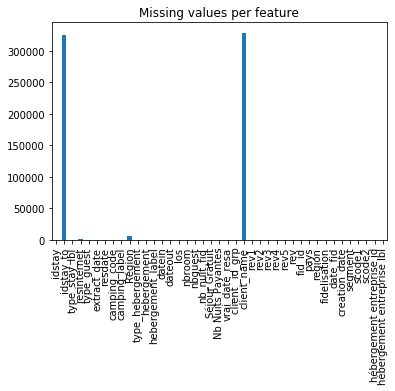

In [10]:
df.isnull().sum().plot.bar()
plt.title('Missing values per feature');

In [11]:
display(df['resinternet'].value_counts(), df['region'].value_counts(), df['idstay'].value_counts())


U20190804TWEAK253643798    2
U20190409MDYLA152047729    2
U20190804TWEAK446398925    2
U20190207GRESS622097778    1
U20181106VEYRA429287719    1
                          ..
O20190620LAUTR76480836     1
O20190321BOONE66588231     1
O20190621TEGHU70233675     1
U20190530GEISS575817871    1
O20190307SOLER56585002     1
Name: resinternet, Length: 328041, dtype: int64

fr    198553
de     36806
nl     27004
es     26213
en     22545
ND     13093
pt      1990
it      1378
ca       857
da       247
Name: region, dtype: int64

839-862     1
869-575     1
825-3856    1
804-366     1
861-985     1
           ..
847-1334    1
847-2063    1
806-6028    1
813-797     1
858-1141    1
Name: idstay, Length: 328686, dtype: int64

In [12]:
# Since region doesn't add any useful information and has null values we will also drop it. There are other features like pays and Région that will cover the information from this column.

df = df.drop(['region', 'idstay', 'idstay_to', 'client_name', 'fid_id', 'hébergement entreprise id', 'client _id_grp'], axis=1)

In [13]:
df.shape

(328686, 34)

In [14]:
sum(df['pays'].isnull())

0

In [15]:
df.shape

(328686, 34)

In [16]:
# No duplicates for bookings.

Since idstay is not a feature and even less numerical continuous we will drop the column.

In [17]:
df.shape

(328686, 34)

In [18]:
df.head()

,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,type_hebergement,hebergement,hebergement_label,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,rev1,rev2,rev3,rev4,rev5,rev,pays,fidelisation,date_fid,creation_date,segment,scode1,scode2,hébergement entreprise lbl
0,INDIV RESID,NaN,N,2019-08-18,2019-04-30,7,LAC DES 3 VALLEES,Midi-PyrÃ©nÃ©es,LOCA,7,Locatif 3 ch. de 0 à 3 *,2019-08-04,2019-08-18,14,1,4,0,0,14,2019-04-30,0.0,0,0.0,14.00,0.0,14.00,FR,1,2015-11-01,2019-04-30,DIRECT,Village,Village,Cottage Tournesol 6p 3ch ***
1,INDIV RESID,U20180827BORTE757778930,N,2019-09-18,2018-11-01,99,PIN PARASOL,Pays de la Loire,LOCA,8,Locatif 3 ch. 4 *,2019-08-21,2019-08-31,10,1,5,0,0,10,2018-09-28,1557.0,0,0.0,10.60,30.0,1597.60,BE,2,2019-01-01,2018-01-04,DIRECT,Village,Village,NS Cottage 6p 3ch 2sdb ****
2,INDIV RESID,O20190429COLLC16682996,N,2019-09-01,2019-04-29,18,SERIGNAN PLAGE,Languedoc-Roussillon,LOCA,5,Locatif 2 ch. de 0 à 3 *,2019-08-29,2019-09-02,4,1,4,0,0,4,2019-04-29,493.0,0,36.0,5.28,0.0,534.28,ES,2,2019-01-01,2019-04-29,Internet,Village,CTV,Cottage Languedoc 4/6p 2ch **
3,INDIV RESID,O20190208BLUSS11438378,N,2019-08-11,2019-02-09,106,LAVEDAN,Midi-PyrÃ©nÃ©es,LOCA,5,Locatif 2 ch. de 0 à 3 *,2019-07-31,2019-08-10,10,1,4,0,0,10,2019-02-09,1373.0,0,36.0,19.00,0.0,1428.00,FR,2,2018-01-01,2018-06-12,Internet,Yelloh,Call Center,Cottage 4p 2ch ***
4,INDIV RESID,O20190504SCALI45172018,N,2019-05-28,2019-05-05,50,PARC DE MONTSABERT,Pays de la Loire,LOCA,6,Locatif 2 ch. 4 *,2019-05-24,2019-05-28,4,1,3,0,0,4,2019-05-05,217.0,0,0.0,3.20,0.0,220.20,FR,1,2015-11-01,2019-05-05,Internet,Village,Thelis,Cottage Tamia 4p ****


We have three duplicate values for interned reservation id. We will drop these rows.

#### TODO: drop internet id

### Data integrity checks if needed

### Defining the dependent variable, as well as all the categorical (nominal / ordinal) and Numerical (continuous / discrete) features

In [19]:
df.head()

,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,type_hebergement,hebergement,hebergement_label,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,rev1,rev2,rev3,rev4,rev5,rev,pays,fidelisation,date_fid,creation_date,segment,scode1,scode2,hébergement entreprise lbl
0,INDIV RESID,NaN,N,2019-08-18,2019-04-30,7,LAC DES 3 VALLEES,Midi-PyrÃ©nÃ©es,LOCA,7,Locatif 3 ch. de 0 à 3 *,2019-08-04,2019-08-18,14,1,4,0,0,14,2019-04-30,0.0,0,0.0,14.00,0.0,14.00,FR,1,2015-11-01,2019-04-30,DIRECT,Village,Village,Cottage Tournesol 6p 3ch ***
1,INDIV RESID,U20180827BORTE757778930,N,2019-09-18,2018-11-01,99,PIN PARASOL,Pays de la Loire,LOCA,8,Locatif 3 ch. 4 *,2019-08-21,2019-08-31,10,1,5,0,0,10,2018-09-28,1557.0,0,0.0,10.60,30.0,1597.60,BE,2,2019-01-01,2018-01-04,DIRECT,Village,Village,NS Cottage 6p 3ch 2sdb ****
2,INDIV RESID,O20190429COLLC16682996,N,2019-09-01,2019-04-29,18,SERIGNAN PLAGE,Languedoc-Roussillon,LOCA,5,Locatif 2 ch. de 0 à 3 *,2019-08-29,2019-09-02,4,1,4,0,0,4,2019-04-29,493.0,0,36.0,5.28,0.0,534.28,ES,2,2019-01-01,2019-04-29,Internet,Village,CTV,Cottage Languedoc 4/6p 2ch **
3,INDIV RESID,O20190208BLUSS11438378,N,2019-08-11,2019-02-09,106,LAVEDAN,Midi-PyrÃ©nÃ©es,LOCA,5,Locatif 2 ch. de 0 à 3 *,2019-07-31,2019-08-10,10,1,4,0,0,10,2019-02-09,1373.0,0,36.0,19.00,0.0,1428.00,FR,2,2018-01-01,2018-06-12,Internet,Yelloh,Call Center,Cottage 4p 2ch ***
4,INDIV RESID,O20190504SCALI45172018,N,2019-05-28,2019-05-05,50,PARC DE MONTSABERT,Pays de la Loire,LOCA,6,Locatif 2 ch. 4 *,2019-05-24,2019-05-28,4,1,3,0,0,4,2019-05-05,217.0,0,0.0,3.20,0.0,220.20,FR,1,2015-11-01,2019-05-05,Internet,Village,Thelis,Cottage Tamia 4p ****


In [20]:
df['type_guest'].value_counts()

N    319365
A      9321
Name: type_guest, dtype: int64

`Categorical nominal`: type_stay_lbl, type_guest, camping_label, Région, pays, segment, scode1, scode2

`Categorical ordinal`: type_hebergement, hebergement_label, fidelisation, hébergement entreprise lbl

`Numerical discrete`: hebergement, los, nbroom, nbguest, nb_nuit_fid, Séjour Gratuit, Nb Nuits Payantes, 

`Numerical continuous`: extract date, resdate, camping code, datein, dateout, vrai_date_resa, client_id, date_fid, creation_date

`Dependend Variable`: rev1, rev2, rev3, rev4, rev5, rev